In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
_pth = 'data/saleprice_dataset.csv'
_cols = ['Advertised_Date', 'Sold_Date', 'Sale_Price', 'Odometer',
         'Power', 'Fuel_Urban', 'Make_Code', 'Family_Code', 'Year_Group',
         'Region_Description', 'Vehicle_Code']

raw_sale = pd.read_csv(_pth, usecols=range(1,12))

In [45]:
raw_sale.head(2)

,Advertised_Date,Sold_Date,Sale_Price,Odometer,Power,Fuel_Urban,Make_Code,Family_Code,Year_Group,Region_Description,Vehicle_Code
0,2020-06-24 00:00:00,2020-07-23,46935.54,7756.0,213.0,13.5,JEEP,GRAND,2019,WA,4126136366665310352
1,2019-11-21 00:00:00,2020-01-13,60556.34,2200.0,184.0,9.3,JEEP,GRAND,2019,WA,4976226188052338111


In [54]:
raw_sale_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122595 entries, 0 to 122594
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Advertised_Date     122595 non-null  object        
 1   Sold_Date           122595 non-null  datetime64[ns]
 2   Sale_Price          122595 non-null  float64       
 3   Odometer            122563 non-null  float64       
 4   Power               122516 non-null  float64       
 5   Fuel_Urban          108789 non-null  float64       
 6   Make_Code           122595 non-null  object        
 7   Family_Code         122595 non-null  object        
 8   Year_Group          122595 non-null  int64         
 9   Region_Description  122595 non-null  object        
 10  Vehicle_Code        122595 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 10.3+ MB


In [130]:
raw_sale.describe().round() #stat summary

,Sale_Price,Odometer,Power,Fuel_Urban,Year_Group,Vehicle_Code
count,122595.0,122563.0,122516.0,108789.0,122595.0,1.225950e+05
mean,24603.0,81177.0,140.0,10.0,2015.0,5.527551e+16
std,18363.0,58879.0,51.0,3.0,4.0,5.311129e+18
min,91.0,0.0,28.0,1.0,1996.0,-9.222430e+18
25%,13497.0,38277.0,110.0,8.0,2013.0,-4.530959e+18
50%,20573.0,71759.0,129.0,10.0,2015.0,1.060213e+17
75%,30900.0,112554.0,147.0,11.0,2017.0,4.637276e+18
max,694545.0,4000380.0,545.0,26.0,2021.0,9.222305e+18


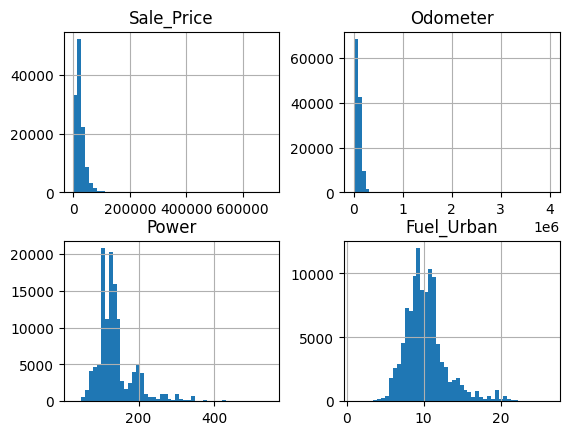

In [95]:
raw_sale.select_dtypes('float').hist(bins=50) # might have to lof-tranform sale_price and odometer
plt.show()

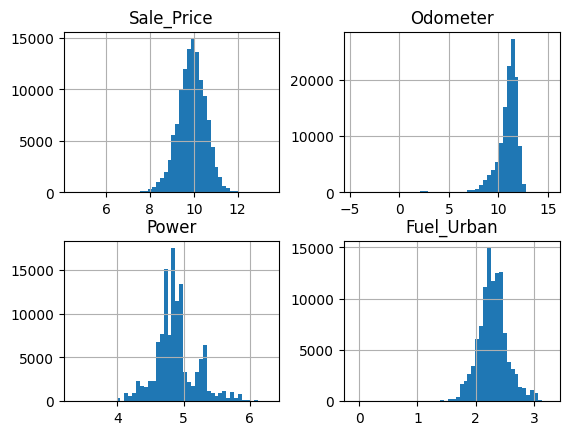

In [131]:
raw_sale.select_dtypes('float').applymap(lambda x: np.log(x+1e-2)).hist(bins=50) # might have to log-tranform some features
plt.show()

<AxesSubplot:>

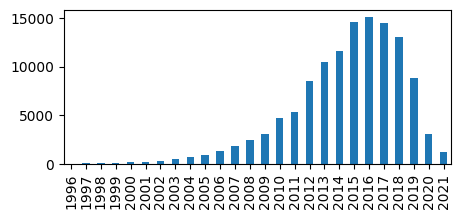

In [152]:
raw_sale.Year_Group.value_counts().sort_index().plot.bar(figsize=(5,2)) #how many records per `Year_Group`? What is year_group: perhaps make of model)?

In [104]:
# how many years of sales data is there?
raw_sale.Sold_Date.str[:4].unique()

array(['2020', '2019', '2021', '2022', '2018'], dtype=object)

<AxesSubplot:xlabel='Power', ylabel='Fuel_Urban'>

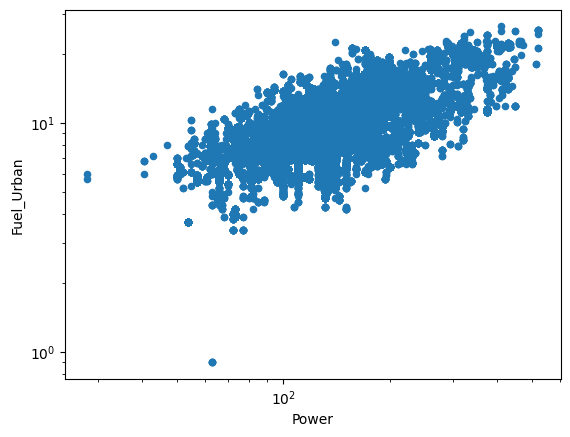

In [116]:
raw_sale.plot.scatter(x='Power',y='Fuel_Urban', loglog=True) # how does fuel change with power, probably create a relashionship to impute fuel_urban

In [161]:
print(f'{60718/raw_sale.shape[0]*100:2.4f}% suspicious Vehicle_Code ')
raw_sale.query('Vehicle_Code<=0') # unusual vehicle codes, VIN # might have to be cleaned

49.5273% suspicious Vehicle_Code 


,Advertised_Date,Sold_Date,Sale_Price,Odometer,Power,Fuel_Urban,Make_Code,Family_Code,Year_Group,Region_Description,Vehicle_Code
2,2019-08-21 00:00:00,2019-10-15,39970.00,38674.0,184.0,9.3,JEEP,GRAND,2017,WA,-5679626332524971677
6,2019-08-03 00:00:00,2019-09-06,31816.36,85185.0,143.0,11.2,FORD,EVEREST,2015,WA,-7358387605770757153
7,2020-01-15 00:00:00,2020-02-21,44545.45,48510.0,213.0,13.5,JEEP,GRAND,2018,WA,-8921023106021724713
8,2019-05-24 00:00:00,2019-06-25,47788.57,2912.0,184.0,9.3,JEEP,GRAND,2018,WA,-8802551192911824092
9,2019-09-19 00:00:00,2019-10-16,36363.64,2008.0,209.0,16.6,JEEP,WRANGLE,2018,WA,-8488957666606336651
...,...,...,...,...,...,...,...,...,...,...,...
122578,2020-01-14 00:00:00,2020-04-06,18172.73,110208.0,150.0,6.3,MERC,CCLASS,2013,QLD,-5817223168853748200
122581,2020-01-23 00:00:00,2020-02-07,14436.36,58151.0,118.0,8.7,VOLK,TIGUAN,2012,QLD,-6978909278333027416
122582,2020-03-18 00:00:00,2020-03-31,13627.27,31023.0,103.0,8.5,TOYO,COROLLA,2015,QLD,-8023875955904102271
122584,2020-02-15 00:00:00,2020-04-16,9081.82,184801.0,123.0,11.5,SUBA,OUTBACK,2012,QLD,-102687443349852300


In [162]:
print(f'{5322/raw_sale.shape[0]*100:2.4f}% missing adv_date ')
raw_sale.loc[raw_sale.Advertised_Date.str[:4].isin(['1967','0001']),:] # columns with adv date missing/suspicious

4.3411% missing adv_date 


,Advertised_Date,Sold_Date,Sale_Price,Odometer,Power,Fuel_Urban,Make_Code,Family_Code,Year_Group,Region_Description,Vehicle_Code
80,0001-01-01 00:00:00,2020-09-04,31914.00,100490.0,190.0,6.9,AUDI,Q5,2016,NSW,-3027914557977900887
81,0001-01-01 00:00:00,2020-09-04,44678.09,13343.0,140.0,8.2,AUDI,Q2,2019,NSW,6290694711270757653
82,0001-01-01 00:00:00,2020-05-23,23409.09,45281.0,110.0,6.4,AUDI,Q2,2016,NSW,-3712723948617586959
83,0001-01-01 00:00:00,2020-05-29,10000.00,119665.0,103.0,NaN,VOLK,TIGUAN,2010,NSW,6444683416370749022
84,0001-01-01 00:00:00,2020-09-17,31019.45,82669.0,140.0,6.8,AUDI,Q5,2016,NSW,5233045925881669291
...,...,...,...,...,...,...,...,...,...,...,...
120392,0001-01-01 00:00:00,2020-06-23,19090.91,29317.0,114.0,10.9,KIA,SPORTAG,2016,WA,8031199125250132906
120408,0001-01-01 00:00:00,2020-03-05,22718.17,15000.0,114.0,10.9,KIA,SPORTAG,2019,WA,-1324785487159983891
120417,0001-01-01 00:00:00,2020-03-13,34090.91,82790.0,150.0,5.5,MERC,CCLASS,2015,WA,-8925181827106071588
120438,0001-01-01 00:00:00,2020-02-19,23172.73,15000.0,114.0,10.9,KIA,SPORTAG,2019,WA,-1324785487159983891


In [163]:
print(f'# of unique years: {raw_sale.Advertised_Date.str[:4].nunique() }')
raw_sale.Advertised_Date.str[:4].unique() # what are the adv years?

# of unique yeas: 11


array(['2020', '2019', '2021', '2022', '0001', '2018', '2017', '2015',
       '1967', '2014', '2016'], dtype=object)

In [ ]:
raw_sale.select_dtypes('object')

,Advertised_Date,Sold_Date,Make_Code,Family_Code,Region_Description
0,2020-06-24 00:00:00,2020-07-23,JEEP,GRAND,WA
1,2019-11-21 00:00:00,2020-01-13,JEEP,GRAND,WA
2,2019-08-21 00:00:00,2019-10-15,JEEP,GRAND,WA
3,2019-10-04 00:00:00,2019-11-12,JEEP,CHEROKE,WA
4,2019-04-08 00:00:00,2019-07-16,JEEP,GRAND,WA
...,...,...,...,...,...
122590,2020-01-07 00:00:00,2020-01-13,SUBA,IMPREZA,QLD
122591,2020-01-15 00:00:00,2020-03-24,SUBA,WRX,QLD
122592,2020-01-08 00:00:00,2020-02-28,HOLD,CAPTIVA,QLD
122593,2020-01-17 00:00:00,2020-03-06,PEUG,5008,QLD


In [52]:
raw_sale.Advertised_Date

0         2020-06-24 00:00:00
1         2019-11-21 00:00:00
2         2019-08-21 00:00:00
3         2019-10-04 00:00:00
4         2019-04-08 00:00:00
                 ...         
122590    2020-01-07 00:00:00
122591    2020-01-15 00:00:00
122592    2020-01-08 00:00:00
122593    2020-01-17 00:00:00
122594    2020-01-31 00:00:00
Name: Advertised_Date, Length: 122595, dtype: object